In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/My Drive/LDS8_DeepLearning/LDS8_DinhVietHa_thi/'

/content/gdrive/My Drive/LDS8_DeepLearning/LDS8_DinhVietHa_thi


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import cv2

import matplotlib.pyplot as plt
import time
%matplotlib inline

In [ ]:
def convertToRGB(img):
  return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## Face Detection

In [ ]:
test1 = cv2.imread('face_glasses_1.jpg')
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)

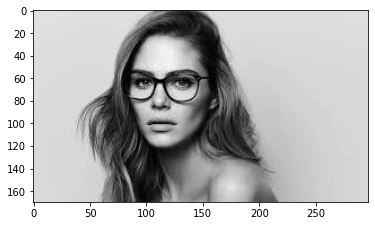

In [ ]:
plt.imshow(gray_img, cmap='gray')

In [ ]:
haar_face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [ ]:
haar_eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [ ]:
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)

In [ ]:
print('Faces found: ', len(faces))

Faces found:  1


In [ ]:
from google.colab.patches import cv2_imshow

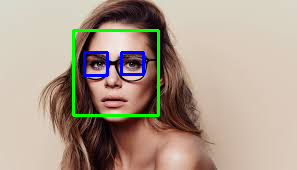

In [ ]:
for (x,y,w,h) in faces:
  cv2.rectangle(test1, (x,y), (x+w, y+h), (0, 255, 0), 2)
  #cv2_imshow(test1)
  #cv2.waitKey(0)

  roi_gray = gray_img[y:y+h, x:x+w]
  roi_color = test1[y:y+h, x:x+w]
  
  eyes = haar_eye_cascade.detectMultiScale(roi_gray,1.01, 5)  
  for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255,0,0), 2)
  cv2_imshow(test1)
  #cv2.waitKey(0)

In [ ]:
len(eyes)

2

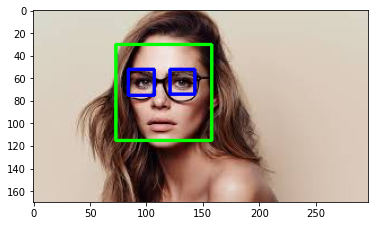

In [ ]:
plt.imshow(convertToRGB(test1))
plt.savefig('face_glasses_1_output.jpg')

In [ ]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
  img_copy = colored_img.copy()

  gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

  faces = f_cascade.detectMultiScale(gray, scaleFactor = scaleFactor, minNeighbors = 5)
  faces_found = len(faces)

  for (x,y,w,h) in faces:
    cv2.rectangle(img_copy, (x,y), (x+w, y+h), (0,255,0),2)

  return img_copy, faces_found

## Body Detection

In [ ]:
img = cv2.imread('body.jpg')

In [ ]:
gray_body = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

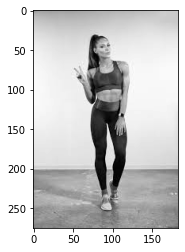

In [ ]:
plt.imshow(gray_body, cmap='gray')

In [ ]:
haar_body_cascade = cv2.CascadeClassifier('haarcascade_fullbody.xml')

In [ ]:
bodies = haar_body_cascade.detectMultiScale(gray_body, 1.35, 2)

In [ ]:
len(bodies)

1

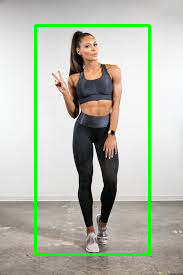

In [ ]:
# Extract bounding boxes for any bodies identified
for (x,y,w,h) in bodies:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2_imshow(img)

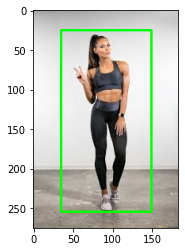

In [ ]:
plt.imshow(convertToRGB(img))
plt.savefig('body_output.jpg')